# EDA Quinteros

Basado en ["End-to-End-Time-Series"](https://github.com/srivatsan88/End-to-End-Time-Series/blob/master/Timeseries_Data_analysis.ipynb) y ["How-To Guide on Exploratory Data Analysis for Time Series Data"](https://medium.com/analytics-vidhya/how-to-guide-on-exploratory-data-analysis-for-time-series-data-34250ff1d04f).

In [27]:
# !pip install seaborn

You should consider upgrading via the 'c:\users\nicol\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [29]:
import sys
import os
from functools import reduce

project_path = os.path.abspath('..')
sys.path.insert(1, project_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils import get_project_root
from src.data.make_dataset import get_minma_data

Datos de los últimos 5 años de la estación Quinteros.
Las variables disponibles son:
- SO2
- NO2
- NO
- NOX
- O3
- CO
- Dirección del viento
- Velocidad del viento
- MP10
- MP25

In [2]:
params = ['SO2','NO2', 'NO', 'NOX', 'O3', 'CO', 'MP10', 'MP25']#,'velviento','dirviento']
from_last = '5y'

In [3]:
quintero_df = get_minma_data(params, 'quintero', from_last=from_last)
quintero_df.head()

c:\users\nicol\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Registros validados_SO2,Registros preliminares_SO2,Registros no validados_SO2,Registros validados_NO2,Registros preliminares_NO2,Registros no validados_NO2,Registros validados_NO,Registros preliminares_NO,Registros no validados_NO,Registros validados_NOX,...,Registros no validados_O3,Registros validados_CO,Registros preliminares_CO,Registros no validados_CO,Registros validados_MP10,Registros preliminares_MP10,Registros no validados_MP10,Registros validados_MP25,Registros preliminares_MP25,Registros no validados_MP25
2017-09-06 18:00:00,NaN,NaN,2.76,NaN,NaN,2.96,NaN,NaN,2.05297,NaN,...,25.0,NaN,NaN,0.25,NaN,NaN,39.0,NaN,NaN,6.0
2017-09-06 19:00:00,NaN,NaN,2.86,NaN,NaN,2.91,NaN,NaN,1.93715,NaN,...,26.0,NaN,NaN,0.26,NaN,NaN,41.0,NaN,NaN,6.0
2017-09-06 20:00:00,NaN,NaN,3.17,NaN,NaN,3.72,NaN,NaN,2.11827,NaN,...,26.0,NaN,NaN,0.27,NaN,NaN,41.0,NaN,NaN,6.0
2017-09-06 21:00:00,NaN,NaN,3.92,NaN,NaN,5.31,NaN,NaN,3.17362,NaN,...,20.0,NaN,NaN,0.33,NaN,NaN,38.0,NaN,NaN,6.0
2017-09-06 22:00:00,NaN,NaN,12.87,NaN,NaN,10.46,NaN,NaN,5.06924,NaN,...,7.0,NaN,NaN,0.46,NaN,NaN,40.0,NaN,NaN,12.0


In [4]:
quintero_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43830 entries, 2017-09-06 18:00:00 to 2022-09-06 23:00:00
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Registros validados_SO2      0 non-null      float64
 1   Registros preliminares_SO2   0 non-null      float64
 2   Registros no validados_SO2   43354 non-null  float64
 3   Registros validados_NO2      0 non-null      float64
 4   Registros preliminares_NO2   0 non-null      float64
 5   Registros no validados_NO2   43257 non-null  float64
 6   Registros validados_NO       0 non-null      float64
 7   Registros preliminares_NO    0 non-null      float64
 8   Registros no validados_NO    43311 non-null  float64
 9   Registros validados_NOX      0 non-null      float64
 10  Registros preliminares_NOX   0 non-null      float64
 11  Registros no validados_NOX   43311 non-null  float64
 12  Registros validados_O3       0 non-null

In [5]:
cols_to_drop = list(quintero_df.filter(regex='(?<!no validados)_.*')) 
quintero_df = quintero_df.drop(cols_to_drop, axis=1)

In [6]:
print('La cantidad de elementos NaN son:')
quintero_df.isna().sum()

La cantidad de elementos NaN son:


Registros no validados_SO2      476
Registros no validados_NO2      573
Registros no validados_NO       519
Registros no validados_NOX      519
Registros no validados_O3       506
Registros no validados_CO       519
Registros no validados_MP10     403
Registros no validados_MP25    1521
dtype: int64

In [7]:
quintero_df.head()

,Registros no validados_SO2,Registros no validados_NO2,Registros no validados_NO,Registros no validados_NOX,Registros no validados_O3,Registros no validados_CO,Registros no validados_MP10,Registros no validados_MP25
2017-09-06 18:00:00,2.76,2.96,2.05297,4.93210,25.0,0.25,39.0,6.0
2017-09-06 19:00:00,2.86,2.91,1.93715,4.77287,26.0,0.26,41.0,6.0
2017-09-06 20:00:00,3.17,3.72,2.11827,5.74518,26.0,0.27,41.0,6.0
2017-09-06 21:00:00,3.92,5.31,3.17362,8.35487,20.0,0.33,38.0,6.0
2017-09-06 22:00:00,12.87,10.46,5.06924,15.28560,7.0,0.46,40.0,12.0


In [8]:
quintero_df.describe()

,Registros no validados_SO2,Registros no validados_NO2,Registros no validados_NO,Registros no validados_NOX,Registros no validados_O3,Registros no validados_CO,Registros no validados_MP10,Registros no validados_MP25
count,43354.000000,43257.000000,43311.000000,43311.000000,43324.000000,43311.000000,43427.000000,42309.000000
mean,8.193720,6.651786,4.562043,11.124358,17.077601,0.248074,38.709144,15.667045
std,19.142225,5.415142,6.853160,10.755792,7.530616,0.110753,18.903504,9.438556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.170000,3.130000,1.564640,4.905500,11.000000,0.180000,26.000000,9.000000
50%,3.040000,4.520000,2.238630,6.855780,17.000000,0.230000,36.000000,14.000000
75%,5.310000,8.440000,4.085390,13.054950,23.000000,0.290000,49.000000,20.000000
max,684.630000,67.380000,129.551000,179.154000,48.000000,2.240000,320.000000,177.000000


Se renombran los nombres de las columnas quitando el texto de 'Registos no validados_' para mayor comprensión posterior.

In [9]:
reg = 'Registros no validados_'

quintero_df.columns = [col_name[len(reg):] for col_name in quintero_df.columns ]

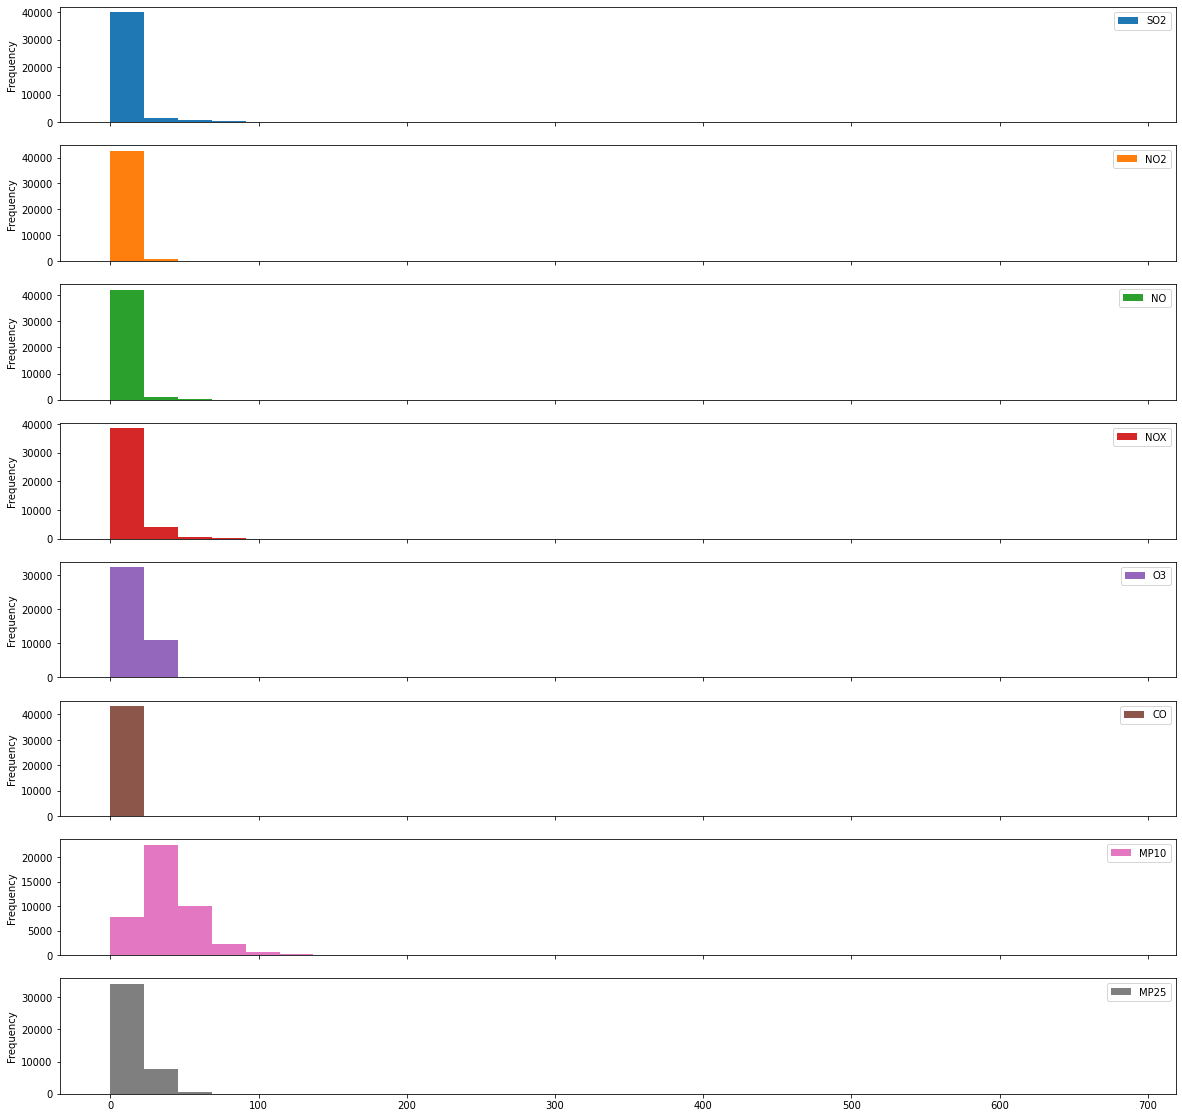

In [10]:
quintero_df.plot.hist(subplots=True, figsize=(20,20), bins=30)
plt.show()

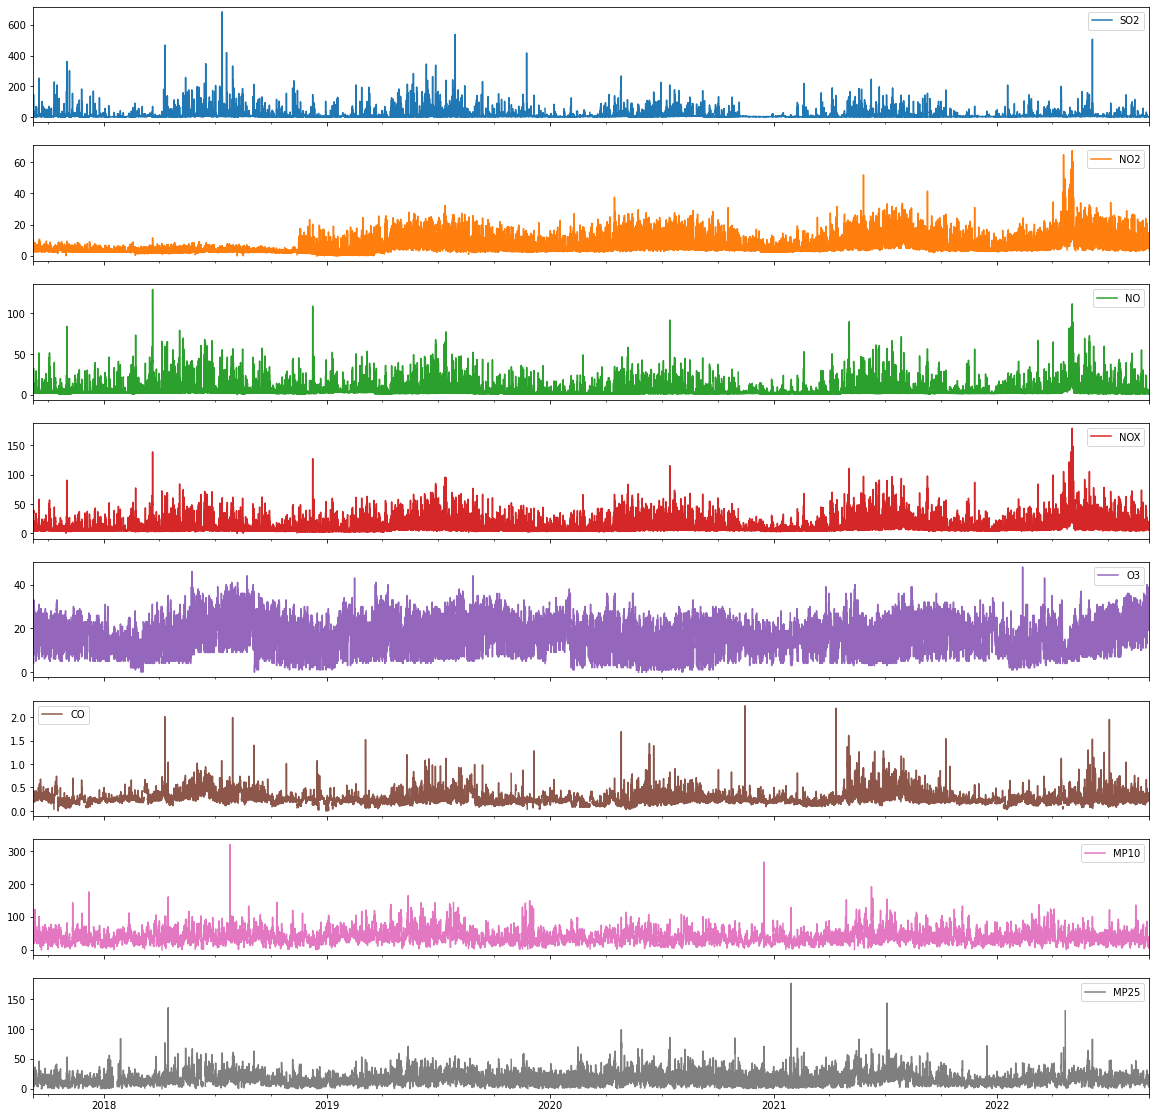

In [11]:
quintero_df.plot(subplots=True, figsize=(20,20))
plt.show()

In [12]:
def hist_year( year, var ):
    if year == ':': quintero_df.loc[:][var].plot(grid=True)
    else: quintero_df.loc[year][var].plot(grid=True)

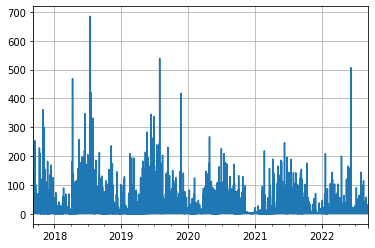

In [13]:
hist_year( ':', 'SO2' )
# quintero_df.loc[:]['SO2'].plot(grid=True)

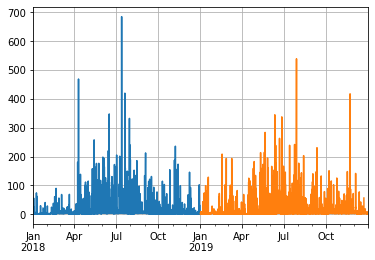

In [14]:
hist_year('2018', 'SO2')
hist_year('2019', 'SO2')

c:\users\nicol\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.
c:\users\nicol\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


Text(0.5, 1.0, 'SO2 plot for the year 2018 and 2019')

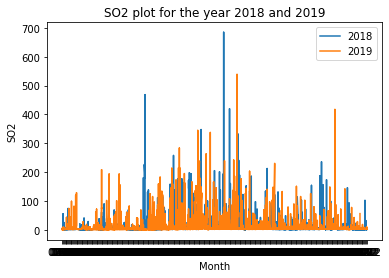

In [15]:
df_2018= quintero_df['2018'].reset_index()
df_2019 = quintero_df['2019'].reset_index()
# df_2018['month_day_hour']=df_2018.apply(lambda x : str(x['month'])+"-"+x['day'],axis=1)
# df_2019['month_day_hour']=df_2019.apply(lambda x : str(x['month'])+"-"+x['day'],axis=1)
plt.plot(df_2018['index'].dt.strftime('%d-%m'), df_2018['SO2'])
plt.plot(df_2019['index'].dt.strftime('%d-%m'), df_2019['SO2'])
plt.legend(['2018', '2019'])
plt.xlabel('Month')
plt.ylabel('SO2')
plt.title('SO2 plot for the year 2018 and 2019')

In [16]:
# pd.to_datetime(df_2018['index'])
# df_2018['index'].dt.strftime('%d-%m')

Valor promedio de SO2 anual, mensual y diario.

In [17]:
# date on a column
# df = quintero_df.reset_index()
df = quintero_df
df['index'] = df.index
df['year'] = df['index'].dt.strftime('%y')
df['month'] = df['index'].dt.strftime('%m')
df['day'] = df['index'].dt.strftime('%d')
df.drop(columns=['index'])
# df.rename(columns={'index': 'date'}, inplace=True)
# df['index']

,SO2,NO2,NO,NOX,O3,CO,MP10,MP25,year,month,day
2017-09-06 18:00:00,2.76,2.96,2.05297,4.93210,25.0,0.25,39.0,6.0,17,09,06
2017-09-06 19:00:00,2.86,2.91,1.93715,4.77287,26.0,0.26,41.0,6.0,17,09,06
2017-09-06 20:00:00,3.17,3.72,2.11827,5.74518,26.0,0.27,41.0,6.0,17,09,06
2017-09-06 21:00:00,3.92,5.31,3.17362,8.35487,20.0,0.33,38.0,6.0,17,09,06
2017-09-06 22:00:00,12.87,10.46,5.06924,15.28560,7.0,0.46,40.0,12.0,17,09,06
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06 19:00:00,2.21,6.98,1.35353,8.33331,36.0,0.35,21.0,13.0,22,09,06
2022-09-06 20:00:00,2.25,5.50,1.30148,6.80131,39.0,0.31,23.0,13.0,22,09,06
2022-09-06 21:00:00,2.27,4.48,1.19537,5.67241,39.0,0.32,22.0,12.0,22,09,06
2022-09-06 22:00:00,2.30,3.92,1.09673,5.01439,39.0,0.27,21.0,10.0,22,09,06


In [18]:
df['2018':'2021'][['year','SO2']].groupby('year').describe()

SO2                                                      
       count       mean        std   min   25%   50%   75%     max
year                                                              
18    8663.0  10.027511  24.148093  0.00  2.01  3.39  6.38  684.63
19    8663.0   9.663670  22.647344  0.50  2.28  3.11  6.00  538.64
20    8672.0   7.310850  15.026407  0.12  2.12  3.06  5.12  267.19
21    8683.0   6.930753  15.620137  0.31  2.00  2.40  3.79  246.48

In [19]:
df['2018':'2021'][['month','SO2']].groupby('month').describe()

SO2                                                           
        count       mean        std   min    25%    50%      75%     max
month                                                                   
01     2932.0   3.446245   6.412475  0.24  1.700  2.200   3.3525  128.65
02     2684.0   4.654892  12.318284  0.12  1.340  1.900   3.4300  218.31
03     2943.0   5.022766  10.191339  0.18  1.680  2.370   4.1950  193.51
04     2848.0   9.867711  23.597153  0.02  1.740  2.830   6.3250  468.60
05     2952.0  14.642388  26.987084  0.57  2.380  3.855  13.0625  283.65
06     2840.0  15.657951  29.298707  0.62  2.700  4.825  14.2000  347.56
07     2950.0  15.199993  31.442027  1.67  3.080  4.395  12.5625  684.63
08     2949.0  10.059939  17.523819  0.01  2.600  4.650   8.3500  203.26
09     2851.0   8.415051  18.434406  0.31  1.975  2.690   5.2100  230.61
10     2953.0   5.798395  12.609107  0.69  2.070  2.430   3.7400  176.10
11     2841.0   5.401158  14.208074  0.00  2.360  3.030   3.6400  417.23
12     2938.0   3.411317   6.448008  0.50  2.070  2.510   2.9300  145.87

In [20]:
df['2018':'2021'][['day','SO2']].groupby('day').describe()

SO2                                                           
      count       mean        std   min     25%    50%     75%     max
day                                                                   
01   1142.0  10.181620  21.028617  0.25  2.1925  2.980  6.3400  189.73
02   1142.0   8.084834  17.256498  0.20  2.0900  2.890  5.2600  205.30
03   1134.0   8.750335  18.669448  0.34  2.0400  2.860  5.8575  212.57
04   1149.0   7.326806  16.334459  0.50  2.0700  2.850  4.6400  194.11
05   1136.0   8.814410  18.429584  0.28  2.0900  2.950  5.8800  187.65
06   1147.0   6.801787  15.283397  0.02  2.1250  2.940  4.2250  189.64
07   1131.0   6.418453  14.056110  0.14  1.9750  2.690  4.3700  235.86
08   1137.0   9.327713  19.390918  0.01  2.0600  3.080  5.4800  201.21
09   1141.0   9.827660  22.138844  0.57  2.1000  3.030  5.9600  246.48
10   1135.0  10.028643  26.812374  0.12  1.9900  2.990  5.5850  468.60
11   1141.0   8.492962  16.784158  0.51  2.0400  3.070  6.0900  155.62
12   1137.0   8.167924  20.670189  0.00  1.9900  2.840  4.8400  344.68
13   1144.0  10.575594  29.623102  0.18  2.0600  3.065  5.7025  684.63
14   1142.0   8.872618  22.844036  0.19  2.0000  3.010  5.2300  257.79
15   1138.0   8.942021  19.762782  0.19  2.0100  2.980  5.0625  185.83
16   1142.0   8.599834  20.120754  0.17  2.0300  2.820  5.4350  347.56
17   1138.0   9.481459  19.728955  0.13  2.1400  3.235  6.5200  208.59
18   1138.0   6.709069  13.559351  0.14  2.0600  3.025  5.2475  163.15
19   1140.0   7.868368  17.892915  0.16  2.0500  2.810  4.8850  218.31
20   1141.0   8.615110  21.896826  0.71  2.0800  2.730  5.3400  419.60
21   1146.0   7.941143  17.593020  0.62  2.1500  2.870  5.2375  283.65
22   1137.0   7.717916  18.140636  0.50  2.1300  2.890  5.5800  263.12
23   1136.0   8.679067  19.825955  0.41  2.1675  2.930  5.6325  417.23
24   1119.0   8.355112  17.582735  0.35  2.1700  2.990  5.2300  181.21
25   1146.0   8.783883  20.946966  0.32  2.0725  3.005  5.2475  241.88
26   1139.0   8.696681  20.420401  0.25  2.0300  2.870  5.9700  267.19
27   1137.0   8.946236  21.620910  0.26  2.1700  2.950  5.6700  337.48
28   1144.0   7.895315  16.370334  0.35  2.1575  2.980  5.2875  182.73
29   1066.0   8.338724  23.929038  0.24  2.0700  2.695  4.5075  538.64
30   1048.0   7.762185  18.768601  0.31  2.1175  2.800  4.7925  332.21
31    668.0   7.443743  17.010460  0.18  1.9375  2.540  5.0000  240.68

<AxesSubplot:xlabel='day'>

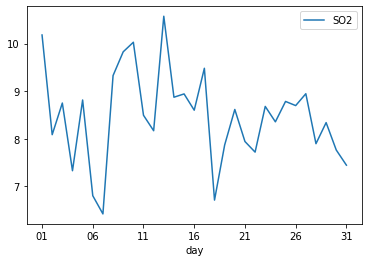

In [21]:
var = 'day'
df['2018':'2021'][[var,'SO2']].groupby(var).mean().plot()

<AxesSubplot:xlabel='month'>

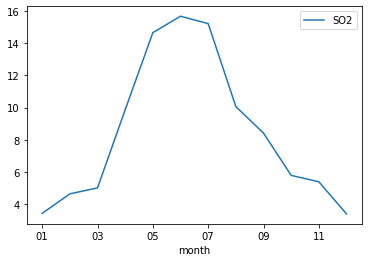

In [22]:
var = 'month'
df['2018':'2021'][[var,'SO2']].groupby(var).mean().plot()

<AxesSubplot:xlabel='year'>

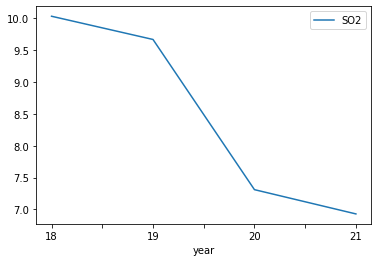

In [23]:
var = 'year'
df['2018':'2021'][[var,'SO2']].groupby(var).mean().plot()

array([<AxesSubplot:>], dtype=object)

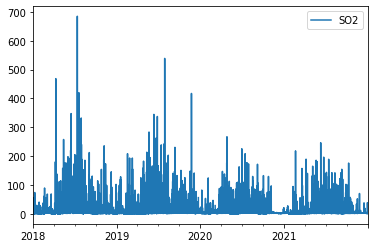

In [24]:
init = '2018'
to = '2021'
var_list = ['SO2']
df[init:to][var_list].plot(subplots=True)

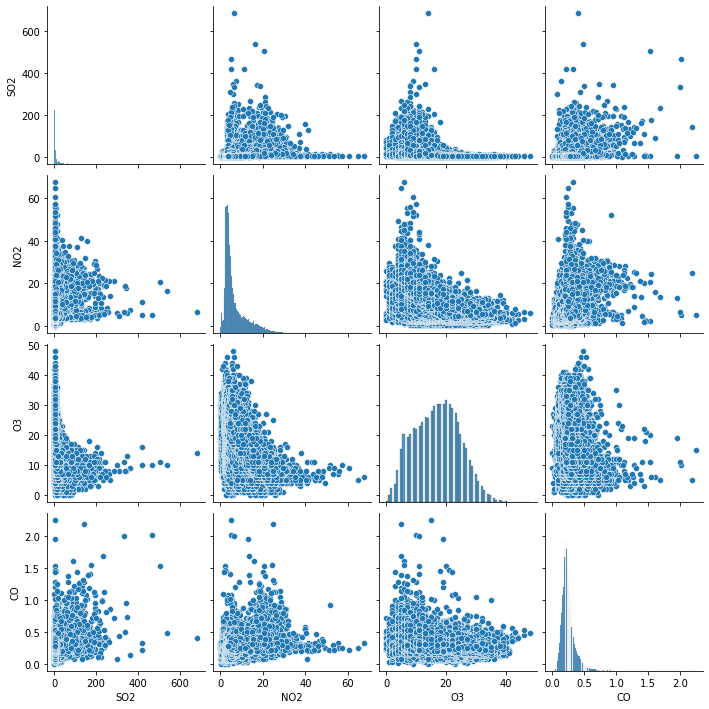

In [31]:
g = sns.pairplot(df[['SO2','NO2','O3', 'CO']])

In [32]:
df_corr=df[['SO2','NO2','O3', 'CO']].corr(method='pearson')
df_corr

,SO2,NO2,O3,CO
SO2,1.000000,0.369224,-0.346016,0.378287
NO2,0.369224,1.000000,-0.513932,0.394418
O3,-0.346016,-0.513932,1.000000,-0.208283
CO,0.378287,0.394418,-0.208283,1.000000


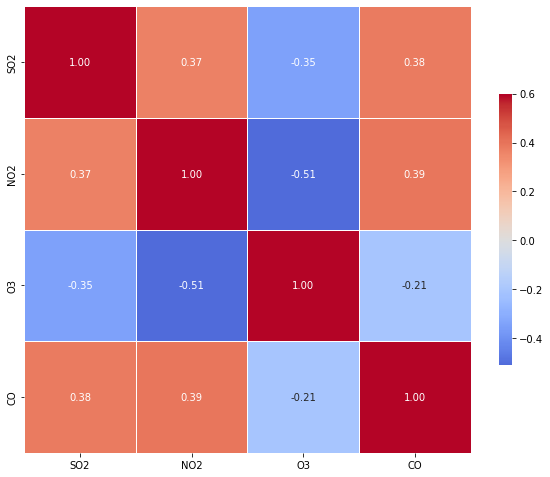

In [33]:
g = sns.heatmap(df_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
    
plt.show()